In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, levene, ttest_ind, chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
import numpy as np

In [2]:
'''
1.1 Read the males_ht_wt_cntry.csv file into a data fram
'''
df = pd.read_csv('males_ht_wt_cntry.csv')

In [3]:
'''
1.2. Examine the data
a. Display some rows to make sure it imported correctly
b. Generate histograms of the heights by country
c. Generate histograms of the weights by country

'''
'''
1.2.a. Display some rows to make sure it imported correctly
'''
print(df.head())

   Height  Weight Country
0    64.0   144.0   Italy
1    68.0   150.0   Italy
2    66.0   147.0   Italy
3    71.0   170.0   Italy
4    65.0   163.0   Italy


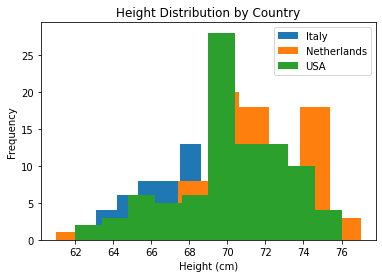

In [4]:
'''
1.2.b. Generate histograms of the heights by country
'''
df.groupby('Country')['Height'].plot(kind='hist', legend=True)
plt.xlabel('Height (cm)')
plt.title('Height Distribution by Country')
plt.show()

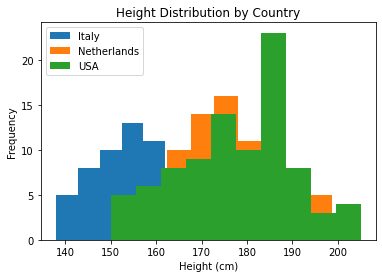

In [5]:
'''
1.2.c. Generate histograms of the weights by country
'''
df.groupby('Country')['Weight'].plot(kind='hist', legend=True)
plt.xlabel('Height (cm)')
plt.title('Height Distribution by Country')
plt.show()

In [6]:
'''
1.3 Conduct an ANOVA test to determine if the weights differ by nationality and interpret your 
results. Use this link as a reference. Make sure you use Levene’s test to check if the variance is 
close to equal.

'''
groups = [df[df['Country'] == country]['Weight'] for country in df['Country'].unique()]
levene_test = levene(*groups)
print(f'Levene\'s test p-value: {levene_test.pvalue}')

# Perform ANOVA test
anova_result = f_oneway(*groups)
print(f'ANOVA p-value: {anova_result.pvalue}')

Levene's test p-value: 0.07218180380373036
ANOVA p-value: 1.9503368513081563e-25


In [7]:
'''
1.4.a. Conduct a test to determine if the weights of the Italian males were significantly 
different than the Dutch males (from the Netherlands) and interpret your results
'''
italian_weights = df[df['Country'] == 'Italy']['Weight']
dutch_weights = df[df['Country'] == 'Netherlands']['Weight']
t_stat, t_pvalue = ttest_ind(italian_weights, dutch_weights, equal_var=True)
print(f'Italian vs. Dutch t-test p-value: {t_pvalue}')


Italian vs. Dutch t-test p-value: 2.6541621479997745e-21


In [8]:
'''
1.4.b. Conduct a test to determine if the weights of the American males were significantly 
different than the Dutch males (from the Netherlands) and interpret your results
'''
american_weights = df[df['Country'] == 'USA']['Weight']
t_stat, t_pvalue = ttest_ind(american_weights, dutch_weights, equal_var=True)
print(f'American vs. Dutch t-test p-value: {t_pvalue}')

American vs. Dutch t-test p-value: 0.6954875719362548


In [19]:
'''
1.5 Conducting multiple tests like this increases the odds of getting false significant results. If you 
had conducted tests for 3 comparisons (Italian vs Dutch, Italian vs American, American vs 
Dutch), what is the probability one of these t-tests is not actually significant (i.e. false positive)?
'''
alpha = 0.05
probability_false_positive = 1 - (1 - alpha) ** 3
print(f'Probability of at least one false positive: {probability_false_positive}')

Probability of at least one false positive: 0.1426250000000001


In [10]:
'''
1.6. When comparing these groups, it’s better to control the FWER. Use a multiple comparison 
procedure with a Tukey adjustment. See this link for how to do this in Python using the 
pairwise_tukeyhsd() function
'''
tukey_result = pairwise_tukeyhsd(df['Weight'], df['Country'], alpha=0.05)
print(tukey_result.summary())

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
      Italy Netherlands  19.2839   -0.0 14.8586 23.7093   True
      Italy         USA  20.0048   -0.0 15.6957 24.3138   True
Netherlands         USA   0.7208 0.9119  -3.434  4.8757  False
--------------------------------------------------------------


In [11]:
'''
2.1 Create a new BMI column. Use the Imperial formula 𝐵𝑀𝐼 =𝑊𝑒𝑖𝑔ℎ𝑡∗703/Height**2
 '''
df['BMI'] = (df['Weight'] * 703) / (df['Height'] ** 2)
df.head()

,Height,Weight,Country,BMI
0,64.0,144.0,Italy,24.714844
1,68.0,150.0,Italy,22.804931
2,66.0,147.0,Italy,23.723829
3,71.0,170.0,Italy,23.707598
4,65.0,163.0,Italy,27.121657


In [12]:
'''
2.2 Create another new column ‘Overweight’ that is a 1 if BMI >= 25 and 0 otherwise. There are 
several ways to do this in Python. 
'''
df['Overweight'] = (df['BMI'] >= 25).astype(int)
df.head()

,Height,Weight,Country,BMI,Overweight
0,64.0,144.0,Italy,24.714844,0
1,68.0,150.0,Italy,22.804931,0
2,66.0,147.0,Italy,23.723829,0
3,71.0,170.0,Italy,23.707598,0
4,65.0,163.0,Italy,27.121657,1


In [13]:
'''
2.3. Create a contingency table of overweight by nationality and examine it. Describe any differences you see between nationalities
'''
Overweight_df = pd.crosstab(df['Country'], df['Overweight'])
Overweight_df

Overweight,0,1
Country,,
Italy,54,16
Netherlands,48,32
USA,38,52


In [14]:
'''
2.4. Conduct a Chi-Sq test using scipy.stats to see if the differences are significant. Explain your findings
'''
chi2, p, dof, expected = chi2_contingency(Overweight_df)

print("\nChi-Square Test:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")


Chi-Square Test:
Chi-Square Statistic: 19.89224489795918
P-value: 4.7913059538762396e-05


In [15]:
'''
3.1. Build a linear regression of to see whether height predicts weight. There are two main modules
for conducting linear regression in Python. Use statsmodels. Explain the results.
'''
X = df['Height'] 
y = df['Weight'] 
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print("Linear Regression using statsmodels:")
print(model.summary())

Linear Regression using statsmodels:
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     135.9
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           3.82e-25
Time:                        19:58:01   Log-Likelihood:                -927.86
No. Observations:                 240   AIC:                             1860.
Df Residuals:                     238   BIC:                             1867.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -2

In [16]:
'''
3.2. Fit the same regression model using linear algebra. Compare your resultant ’s to the ones you 
obtained earlier
'''
X_matrix = np.column_stack((np.ones(len(X)), X['Height']))

# Calculate the beta coefficients using linear algebra (OLS formula)
beta = np.linalg.inv(X_matrix.T.dot(X_matrix)).dot(X_matrix.T).dot(y)

# Print the beta coefficients
print("\nLinear Regression using Linear Algebra (Beta Coefficients):")
print(f"Intercept (Beta 0): {beta[0]}")
print(f"Height coefficient (Beta 1): {beta[1]}")


Linear Regression using Linear Algebra (Beta Coefficients):
Intercept (Beta 0): -28.254701729393005
Height coefficient (Beta 1): 2.8536531102606486


Regression model using linear algebra has the same resultant compared with the ones we obtained earlier